In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from scipy.optimize import minimize
from IPython.display import display

pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
def VaR_CVaR(data, n_stocks, conf, long):
     
     valor_posicion = n_stocks * data.iloc[-1]
     weights = [valor_posicion.iloc[i]/valor_posicion.sum() for i in range(len(n_stocks))]  
     rt_assets = data.pct_change().dropna()
     rt_port = rt_assets.mul(weights).sum(axis=1)

     var = np.percentile(rt_port,100-conf) if long else np.percentile(rt_port,conf)
     cvar = rt_port[rt_port < var].mean() if long else rt_port[rt_port > var].mean()
          
     var_m = var * valor_posicion.sum()
     cvar_m = cvar * valor_posicion.sum()
     
     resultados_df = pd.DataFrame({"Métrica": ["VaR", "CVaR"], "Porcentual (%)": [var * 100, cvar * 100], "Monetario ($)": [var_m, cvar_m]})

     return resultados_df

In [3]:
stocks = ['AAPL', 'AMD', 'JPM', 'LMT', 'TSLA']

data = yf.download(stocks, start="2020-01-01", end="2023-01-01")['Close'][stocks] #No puedo descargar el ajustado

positions = [339, 125, 450, 620, 222]

long = True #True o False

conf = 95 #[0, 100]

VaR_CVaR(data, positions, conf, long)

[*********************100%***********************]  5 of 5 completed


,Métrica,Porcentual (%),Monetario ($)
0,VaR,-2.29,"-10,119.22"
1,CVaR,-3.99,"-17,628.55"


In [4]:
import vartools as vt

In [5]:
data = pd.read_excel("Prueba.xlsx")
data

,Date,AMD,AAPL
0,2025-02-14,113.1000,244.6000
1,2025-02-13,111.8100,241.5300
2,2025-02-12,111.7200,236.8700
3,2025-02-11,111.1000,232.6200
4,2025-02-10,110.4800,227.6500
...,...,...,...
495,2023-02-24,78.0900,146.7100
496,2023-02-23,79.7500,149.4000
497,2023-02-22,76.6100,148.9100
498,2023-02-21,76.7700,148.4800


In [6]:
data.set_index('Date', inplace=True)

In [7]:
stocks = data.columns
n_stocks = [150, 135]
conf = 95
long = True

var_df = vt.var_stocks(data, n_stocks, conf, long, stocks)
var_df

,Métrica,Porcentaje,cash
0,VaR,0.0247,"1,233.7491"
1,cVaR,0.0331,"1,653.4282"


In [13]:
stocks = ['GOOGL','AMD','JPM']
start = '2020-01-01'
end = '2023-01-01'
type = 'Adj Close'

data = vt.get_data(stocks, start, end, type)
rt = data.pct_change().dropna()
data

[*********************100%***********************]  3 of 3 completed


Ticker,GOOGL,AMD,JPM
Date,,,
2020-01-02 00:00:00+00:00,68.1868,49.1000,121.4772
2020-01-03 00:00:00+00:00,67.8301,48.6000,119.8742
2020-01-06 00:00:00+00:00,69.6381,48.3900,119.7788
2020-01-07 00:00:00+00:00,69.5035,48.2500,117.7425
2020-01-08 00:00:00+00:00,69.9983,47.8300,118.6610
...,...,...,...
2022-12-23 00:00:00+00:00,88.9077,64.5200,123.8672
2022-12-27 00:00:00+00:00,87.0743,63.2700,124.3012
2022-12-28 00:00:00+00:00,85.7093,62.5700,124.9805


In [16]:
sharpe_df = vt.mcc_portfolio(rt, 0.05)
sharpe_df

,w
Ticker,
GOOGL,0.3610
AMD,0.2521
JPM,0.3869


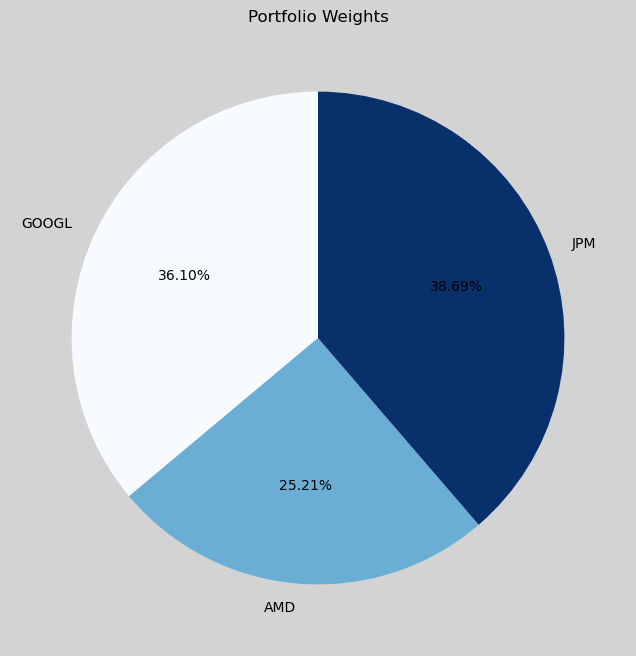

In [17]:
vt.plot_weights(sharpe_df)